In [1]:
#%matplotlib qt

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from knn import KNN

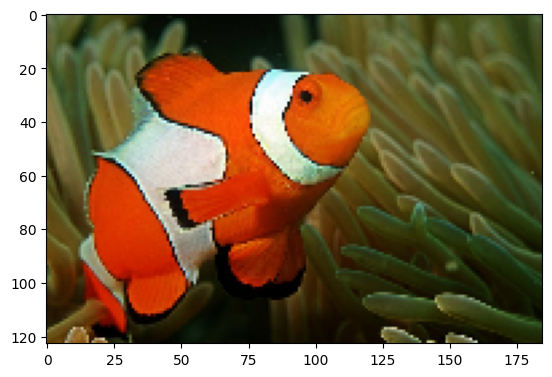

In [3]:
nemo = cv2.imread("nemo.jpg")
nemo = cv2.cvtColor(nemo , cv2.COLOR_BGR2RGB)
nemo = cv2.resize(nemo , (0,0) , fx=0.2 , fy=0.2)

plt.imshow(nemo)
plt.show()

In [4]:
a = np.array([])
nemo.shape

(123, 185, 3)

# create dataset from pixels

In [5]:
pixels_list = nemo.reshape(-1 , 3) #tedade sotoon ha 3 tast (RGB), tedade satr ha ro nemidoonim pas -1 mizarim 
pixels_list.shape
# number of data = 569490 , with 3 feature for each pixel

(22755, 3)

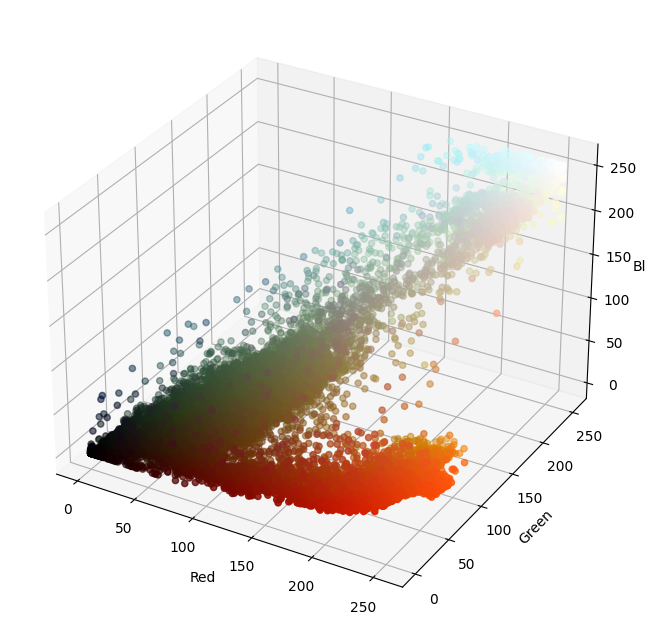

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# pixels_list[: , 0] = green values 
# pixels_list[: , 1] = blue values 
# pixels_list[: , 2] = red values 
# c=pixels_list / 255 = each pixels show as it's own color
ax.scatter(pixels_list[: , 0] , pixels_list[: , 1] , pixels_list[: ,2 ] , c=pixels_list / 255 , marker= "o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue" )
plt.show()


In [7]:
nemo_hsv = cv2.cvtColor(nemo , cv2.COLOR_RGB2HSV)
nemo.shape

(123, 185, 3)

In [8]:
pixels_list_hsv = nemo_hsv.reshape(-1 ,3)
pixels_list_hsv

array([[ 41,  56, 122],
       [ 40,  77, 120],
       [ 39,  94, 109],
       ...,
       [ 34, 240,  35],
       [ 34, 255,  33],
       [ 35, 239,  32]], dtype=uint8)

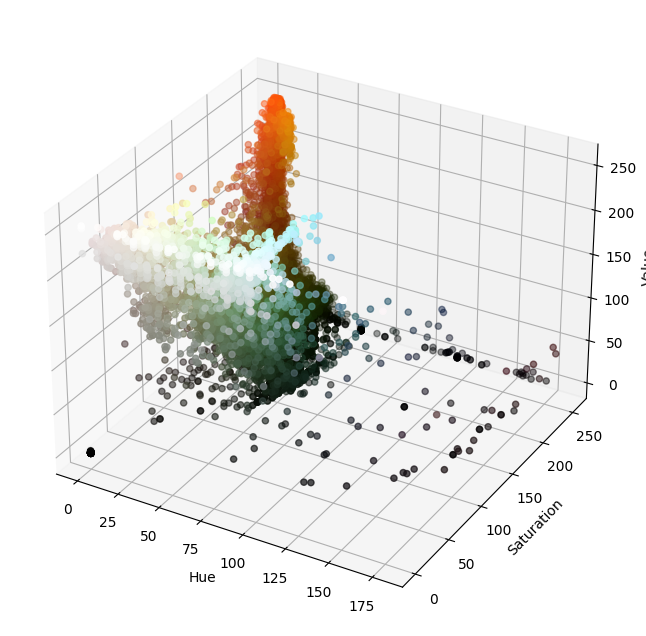

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pixels_list_hsv[: , 0] , pixels_list_hsv[: , 1] , pixels_list_hsv[: ,2 ] , c=pixels_list / 255)
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value" )
plt.show()

# select orange color range 

In [10]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

# Create MASK for orange parts

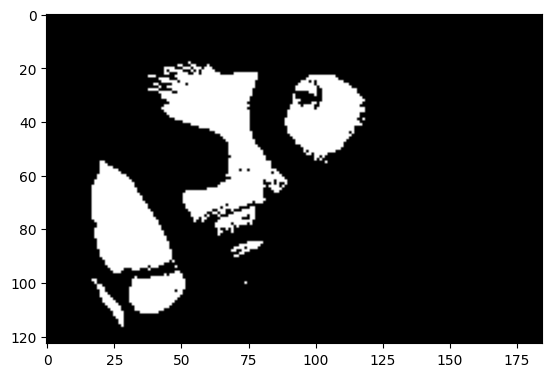

In [11]:
# Create MASK 
mask = cv2.inRange(nemo_hsv, light_orange, dark_orange) 
plt.imshow(mask , cmap="gray")

# create MASK for white parts 

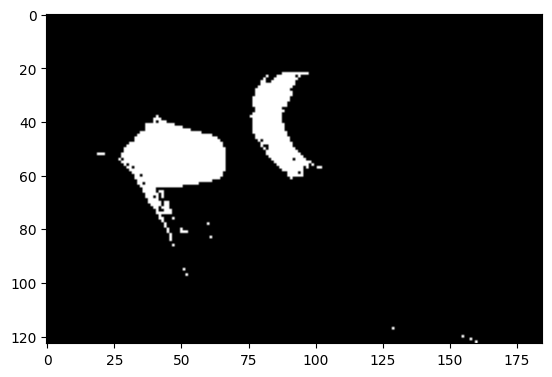

In [12]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

white_mask = cv2.inRange(nemo_hsv , light_white ,dark_white  )
plt.imshow(white_mask , cmap="gray")

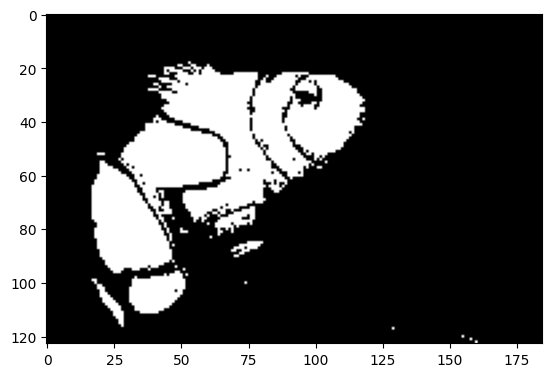

In [13]:
final_mask =  mask + white_mask
plt.imshow(final_mask , cmap="gray")

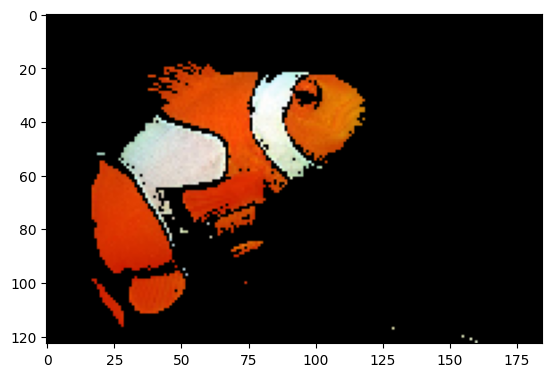

In [14]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result , cmap="gray")

# Training :

### consider "pixels_list_hsv" as train dataset

### normalize our data by dividing into 255 :

In [15]:
x_train = pixels_list_hsv / 255 
x_train.shape
# 3 means = hue , sat , value numbers


(22755, 3)

## consider final mask as labels :

### consider nemo pixels as 1 label 
### consider image-background as 0 label ( NOT nemo )

In [16]:
final_mask.shape 
# its not like dataset , but looks like an image , so we resahpe it in next line 

(123, 185)

In [17]:
# 1 = label  hast . nemo / or not nemo 
y_train = final_mask.reshape(-1 ,) // 255     
y_train.shape
#y_train

(22755,)

In [18]:
knn = KNN(3)
knn.fit(x_train , y_train)

In [19]:
new_pixel = np.array([100,100,0] ) / 255
new_pixel = np.array([10,200,255] ) / 255

print(new_pixel)
print(new_pixel.dtype)
knn.predict([new_pixel])

[0.03921569 0.78431373 1.        ]
float64


[1]

# prediction for new images : 

(89, 160, 3)

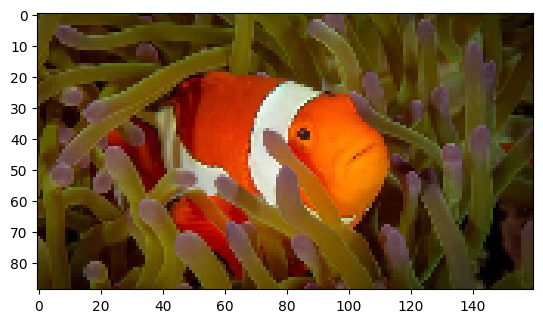

In [20]:
dashe_nemo = cv2.imread("dashe-nemo.jpg")
dashe_nemo = cv2.resize(dashe_nemo , (0,0) , fx=0.25 , fy=0.25)
dashe_nemo = cv2.cvtColor(dashe_nemo , cv2.COLOR_BGR2RGB)
dashe_nemo_hsv = cv2.cvtColor(dashe_nemo , cv2.COLOR_RGB2HSV)
plt.imshow(dashe_nemo, cmap="gray")
dashe_nemo_hsv.shape
# its shape is a picture format shape , we should convert it to dataset type

In [21]:
x_test  = dashe_nemo_hsv.reshape(-1,3) / 255 
x_test = np.array(x_test)
print(x_test.shape)

(14240, 3)


In [22]:
Y_pred_bro = knn.predict(x_test)

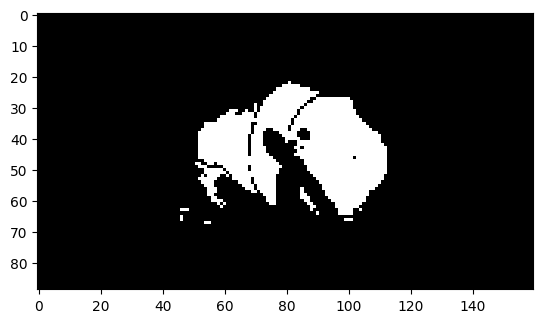

In [23]:
Y_pred_bro = np.array(Y_pred_bro)
output1 = Y_pred_bro.reshape(dashe_nemo_hsv.shape[:2])
plt.imshow(output1 , cmap="gray")

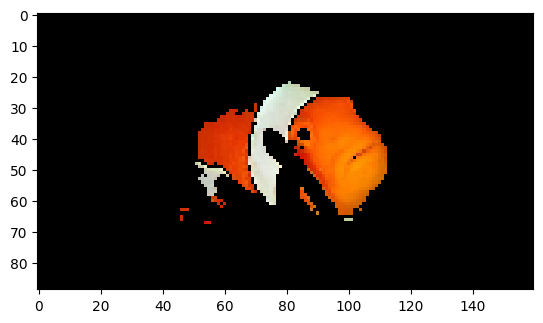

In [24]:
output1 = output1.astype("uint8")
final_result1 = cv2.bitwise_and(dashe_nemo , dashe_nemo, mask=output1)
plt.imshow(final_result1 , cmap="gray")

# prediction for nemo's sister :

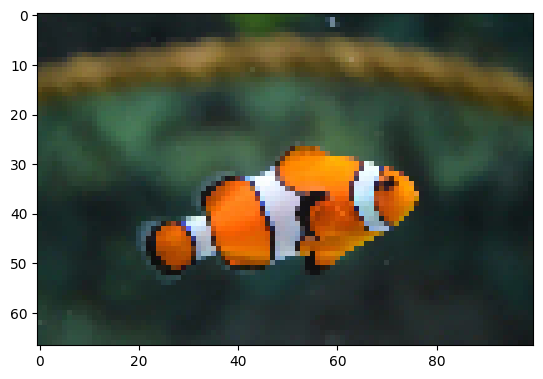

In [25]:
abjie_nemo = cv2.imread("abjie-nemo.jpg")
abjie_nemo = cv2.resize(abjie_nemo , (0,0) , fx=0.05 , fy=0.05)
abjie_nemo = cv2.cvtColor(abjie_nemo , cv2.COLOR_BGR2RGB)
plt.imshow(abjie_nemo)

In [26]:
abjie_nemo_hsv = cv2.cvtColor(abjie_nemo , cv2.COLOR_RGB2HSV)

In [ ]:
x_test = abjie_nemo_hsv.reshape(-1,3) /255
x_test = np.array(x_test)

Y_pred_sis = knn.predict(x_test)
Y_pred_sis

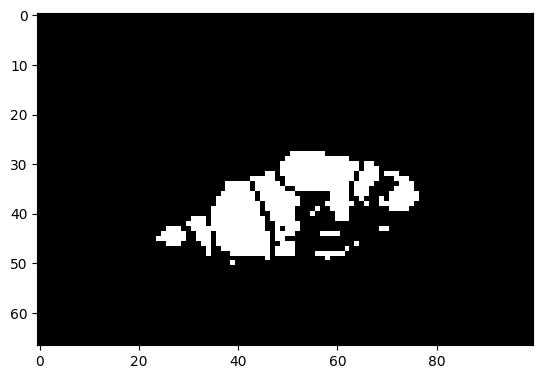

In [28]:
Y_pred_sis = np.array(Y_pred_sis)
output2 = Y_pred_sis.reshape(abjie_nemo_hsv.shape[:2])
plt.imshow(output2 , cmap="gray")

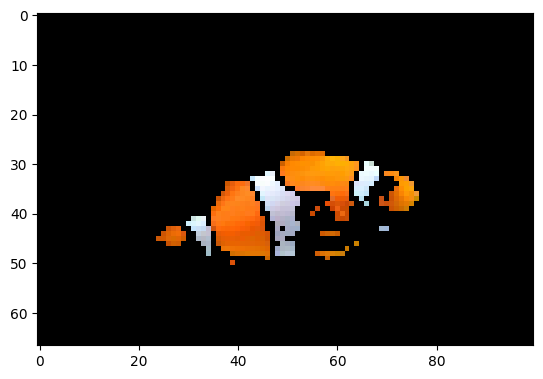

In [29]:
output2 = output2.astype("uint8")
final_result2 = cv2.bitwise_and(abjie_nemo , abjie_nemo , mask=output2)
plt.imshow(final_result2 , cmap="gray")